In [ ]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as immg
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

import pandas as pd
import tensorflow as tf
import keras as keras
from keras import layers

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from skimage.util import random_noise
from skimage import data
from skimage.filters import threshold_multiotsu

In [ ]:
import os
from os import listdir
from PIL import Image

In [ ]:
def preprocess(img, noise=False, noiseFactor=None):
  
  # Sharpen Image
  kernel = np.array([[0,-2,0], 
                   [-2,10,-2], 
                   [0,-2,0]]) 
  #img = cv2.filter2D(img, -1, kernel/5)
  #img = img.astype("uint8")

  # Add Median Blur
  #img = cv2.medianBlur(img, 3)

  # Add Noise if desired
  #if noise != False:
  #  img = noiseToImg(img, noise)
  hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  h,s,v = cv2.split(hsv_img)
  hsv_split = np.concatenate((h,s,v),axis=1)

  thresholds = threshold_multiotsu(v, classes=2)
  if noise: v = addNoise(v, noiseFactor)
  # Using the threshold values, we generate the three regions.
  regions = np.digitize(v, bins=thresholds)
  
  #regions = regions.astype("uint8")

  return regions

In [ ]:
# get the path/directory
#folder_dir = '/content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/Aerospace PCB Our Pics/defect'
#save_to_dir = '/content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/Aerospace PCB Our Pics/defect_processed_h'
folder_dir = '/content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/Aerospace PCB Our Pics/nodefect'
save_to_dir = '/content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/Aerospace PCB Our Pics/nodefect_processed_h'

for images in os.listdir(folder_dir):
  #print(images)
  #image = cv2.imread('/content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/Aerospace PCB Our Pics/defect/'+images, cv2.IMREAD_COLOR)
  image = cv2.imread('/content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/Aerospace PCB Our Pics/nodefect/'+images, cv2.IMREAD_COLOR)
  #cv2_imshow(image)
	# check if the image ends with png
	#if (images.endswith(".JPG")):
		#print(images)
  rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  r,g,b = cv2.split(rgb_img)
  for i in range(len(g)):
    for j in range(len(g[i])):
      g[i][j] = 0
  gb_split = np.concatenate((r,g,b),axis=1)
  #cv2_imshow(rgb_split)
  rgb = np.dstack((b,g,r))
  #cv2_imshow(rgb)

  new_img = preprocess(rgb)
  #shadow_mask = remove_shadows(new_img)
  #shadow_mask = shadow_mask[:,:,0]
  #cv2_imshow(rgb)
  hsv_img = cv2.cvtColor(rgb, cv2.COLOR_BGR2HSV)
  h,s,v = cv2.split(hsv_img)
  hsv_split = np.concatenate((h,s,v),axis=1)

  thresholds = threshold_multiotsu(v, classes=3)

  # Using the threshold values, we generate the three regions.
  regions = np.digitize(v, bins=thresholds)
  #mask = (shadow_mask ^ regions)
  processed_image = regions*255
  os.chdir(save_to_dir)
  cv2.imwrite(str(images),processed_image)
  cv2_imshow(regions*255)
  os.chdir(folder_dir)



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
image_path = '/content/drive/MyDrive/Senior Year/Spring 2023/ENEE439D/ENEE 439D Final Project/Aerospace PCB Our Pics/defect/1.JPG'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

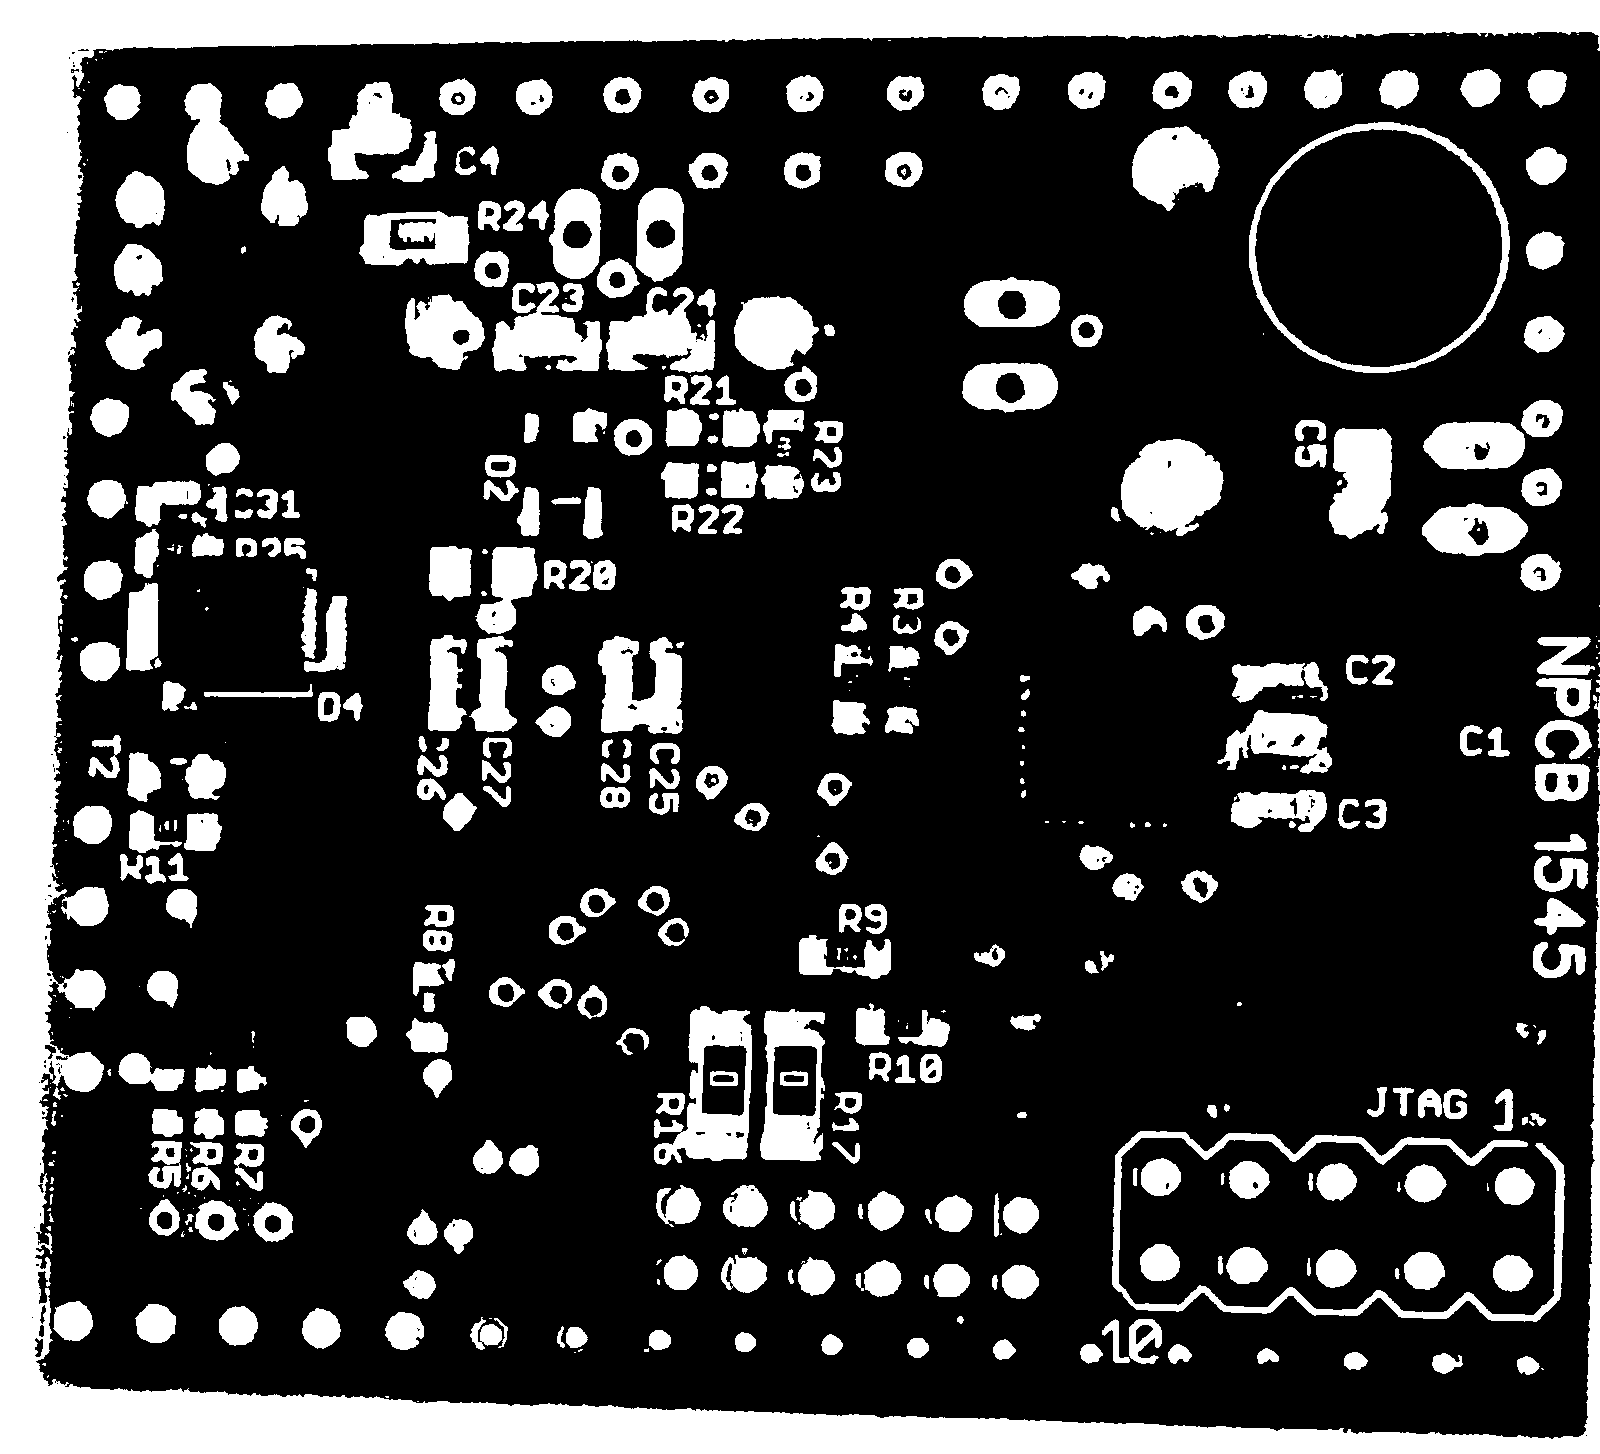

In [ ]:
#RGB Split G = 0
rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(rgb_img)
for i in range(len(g)):
  for j in range(len(g[i])):
    g[i][j] = 0
rgb_split = np.concatenate((r,g,b),axis=1)
#cv2_imshow(rgb_split)
rgb = np.dstack((b,g,r))
#cv2_imshow(rgb)

new_img = preprocess(rgb)
#shadow_mask = remove_shadows(new_img)
#shadow_mask = shadow_mask[:,:,0]
#cv2_imshow(rgb)
hsv_img = cv2.cvtColor(rgb, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv_img)
hsv_split = np.concatenate((h,s,v),axis=1)

thresholds = threshold_multiotsu(v, classes=3)

# Using the threshold values, we generate the three regions.
regions = np.digitize(v, bins=thresholds)
#mask = (shadow_mask ^ regions)
cv2_imshow(regions*255)